In [142]:
from matchms.importing import load_from_msp
from RIAssigner.data import PandasData
from RIAssigner.compute import CubicSpline
import matplotlib.pyplot as plt


In [2]:
spectra = list(load_from_msp("..\\tests\\data\\msp\\recetox_gc-ei_ms_20201028.msp"))

In [143]:
ref = PandasData("..\\tests\\data\\csv\\Alkanes_20210325.csv", "csv", "min")
cols = ref._data.columns
labels = ref._data.loc[:,cols[0]].tolist()

C:\Users\473355\Miniconda3\lib\site-packages\numpy\core\_asarray.py:102: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return array(a, dtype, copy=False, order=order)


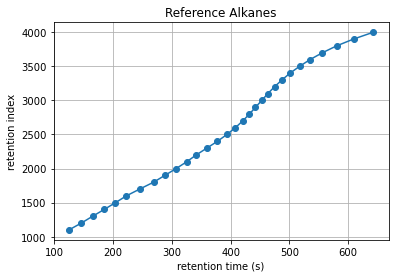

In [6]:
fig, ax = plt.subplots()
ax.plot(ref.retention_times, ref.retention_indices, '-o', data=labels)
ax.set(xlabel='retention time (s)', ylabel='retention index', title='Reference Alkanes')
ax.grid()
plt.show()

In [148]:
alkanes_data = ref._data
fig = px.scatter(alkanes_data, x="RT", y="retention_index", text=alkanes_data[alkanes_data.columns[0]])
fig.update_traces(textposition="bottom right")

fig.show()

In [102]:
import plotly.express as px
import plotly.graph_objects as go
from matchms.importing import load_from_msp
from matchms.filtering import add_precursor_mz, add_retention_index
import pandas

library = list(load_from_msp("..\\tests\\data\\msp\\recetox_gc-ei_ms_20201028.msp"))
filtered_spectra = [add_retention_index(x) for x in library]
filtered_spectra = [add_precursor_mz(x) for x in filtered_spectra]
spectra_metadata = [x.metadata for x in filtered_spectra][20:50]
data = pandas.DataFrame(spectra_metadata)

In [62]:
fig = px.scatter(data, x="retention_index", y="precursor_mz", text=data["name"])
fig.update_traces(textposition="bottom right")


fig.show()

In [132]:
deconv_spectra = list(load_from_msp("data\\deconvoluted_spline.msp"))
annotation_table = pandas.read_csv("data\\annotations_v2.tsv", sep = None, index_col = 0)

C:\Users\473355\Miniconda3\lib\site-packages\pandas\util\_decorators.py:311: ParserWarning:

Falling back to the 'python' engine because the 'c' engine does not support sep=None with delim_whitespace=False; you can avoid this warning by specifying engine='python'.



In [133]:
annotated_spectra = list(filter(lambda x: x.get("name") in list(annotation_table.index), deconv_spectra))
named_spectra = [x.set("name", annotation_table.loc[x.get("name"), "reference"]) for x in annotated_spectra]

In [134]:
metabolite_lib = list(load_from_msp("data\\metabolite_lib.msp"))
metabolite_lib_annotations = list(filter(lambda x: x.get("name") in list(annotation_table["reference"]), metabolite_lib))
metabolite_lib_spectra = [add_retention_index(x).metadata for x in metabolite_lib_annotations]
metabolite_lib_data = pandas.DataFrame(metabolite_lib_spectra)
metabolite_lib_data["group"] = "library"


In [135]:
annotation_data = pandas.DataFrame([add_retention_index(x).metadata for x in named_spectra])
annotation_data["group"] = "annotation"

In [136]:
merged_data = pandas.concat([metabolite_lib_data, annotation_data])

In [137]:
fig = px.scatter(merged_data, x="name", y="retention_index", color = "group")

fig.show()